#Q1

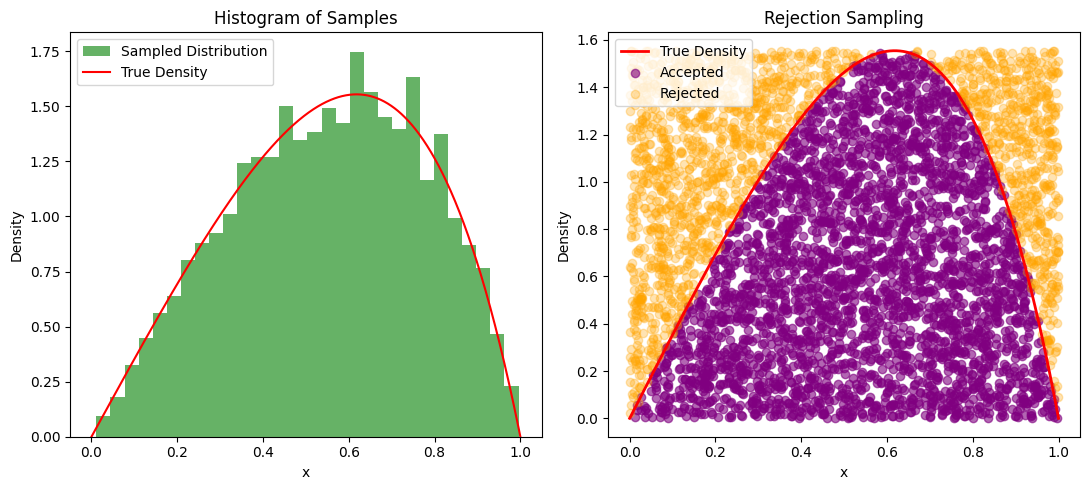

c: 1.5546427746085723


In [56]:
import numpy as np
import matplotlib.pyplot as plt

# Target density function
def density(x):
    return (x * (1 - x) * np.exp(x)) / (3 - np.exp(1))

# Determine scaling factor
x_vals = np.linspace(0, 1, 1000)
y_vals = density(x_vals)
c = max(y_vals)

# Rejection Sampling
accepted, rejected, samples = [], [], []
num_samples = 5000
for _ in range(num_samples):
    x = np.random.uniform(0, 1)
    u = np.random.uniform(0, 1)
    if u <= density(x) / c:
        accepted.append((x, u * c))
        samples.append(x)
    else:
        rejected.append((x, u * c))

# Plot results
plt.figure(figsize=(11, 5))

plt.subplot(1, 2, 1)
plt.hist(samples, bins=30, density=True, alpha=0.6, color='green', label='Sampled Distribution')
plt.plot(x_vals, y_vals, 'r-', label='True Density')
plt.xlabel('x'); plt.ylabel('Density'); plt.legend(); plt.title('Histogram of Samples')

plt.subplot(1, 2, 2)
plt.plot(x_vals, y_vals, 'r-', linewidth=2, label='True Density')
plt.scatter(*zip(*accepted), color='purple', alpha=0.6, label='Accepted')
plt.scatter(*zip(*rejected), color='orange', alpha=0.3, label='Rejected')
plt.xlabel('x'); plt.ylabel('Density'); plt.legend(); plt.title('Rejection Sampling')

plt.tight_layout()
plt.show()
print("c:", c)


#Q2

Acceptance rate: 0.244


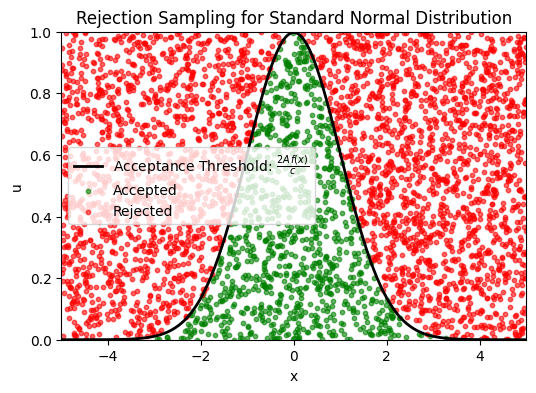

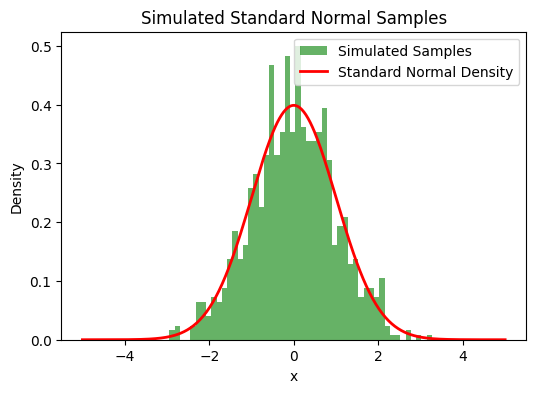

In [62]:
import numpy as np
import matplotlib.pyplot as plt

# Define the standard normal density f(x)
def f(x):
    return (1/np.sqrt(2*np.pi)) * np.exp(-0.5 * x**2)

# Proposal density: Uniform on [-A, A]
A = 5.0
def h(x):
    return 1/(2*A)
c = 4.0  # chosen constant

def rejection_sampling(n_samples):
    accepted = []  # to store accepted candidate points as (x, u)
    rejected = []  # to store rejected candidate points as (x, u)
    n_iter = 0

    while len(accepted) < n_samples:
        # Step 1: Sample candidate x from Uniform[-A, A]
        x = np.random.uniform(-A, A)
        # Step 2: Sample u from Uniform[0,1]
        u = np.random.rand()
        threshold = (2 * A * f(x)) / c
        if u <= threshold:
            accepted.append((x, u))
        else:
            rejected.append((x, u))
        n_iter += 1

    print(f"Acceptance rate: {n_samples / n_iter:.3f}")
    return np.array(accepted), np.array(rejected)

# Generate samples
n_samples = 1000
accepted, rejected = rejection_sampling(n_samples)

# Prepare values for plotting the acceptance threshold curve
x_vals = np.linspace(-A, A, 400)
threshold_vals = (2 * A * f(x_vals)) / c

# Plot 1: Visualization of the acceptance and rejection regions
plt.figure(figsize=(6, 4))
plt.plot(x_vals, threshold_vals, 'k-', lw=2, label=r'Acceptance Threshold: $\frac{2A\,f(x)}{c}$')

# Plot accepted and rejected candidate points
if accepted.size:
    plt.scatter(accepted[:, 0], accepted[:, 1], color='green', s=10, alpha=0.6, label='Accepted')
if rejected.size:
    plt.scatter(rejected[:, 0], rejected[:, 1], color='red', s=10, alpha=0.6, label='Rejected')

plt.xlabel('x')
plt.ylabel('u')
plt.title('Rejection Sampling for Standard Normal Distribution')
plt.legend()
plt.xlim(-A, A)
plt.ylim(0, 1)
plt.show()

# Plot 2: Histogram of accepted samples with theoretical standard normal density
plt.figure(figsize=(6, 4))
accepted_x = accepted[:, 0]
plt.hist(accepted_x, bins=50, density=True, alpha=0.6, color='green', label='Simulated Samples')
x_hist = np.linspace(-A, A, 400)
plt.plot(x_hist, f(x_hist), 'r-', lw=2, label='Standard Normal Density')
plt.xlabel('x')
plt.ylabel('Density')
plt.title('Simulated Standard Normal Samples')
plt.legend()
plt.show()

#Q3

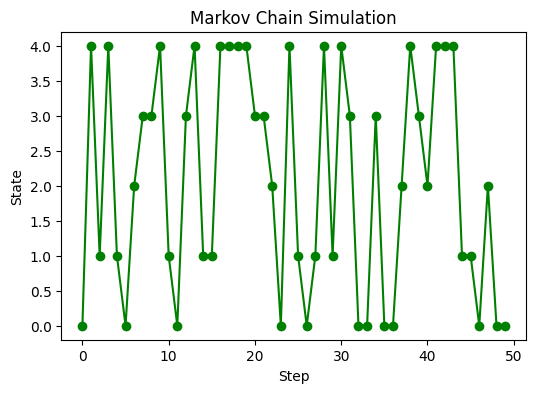

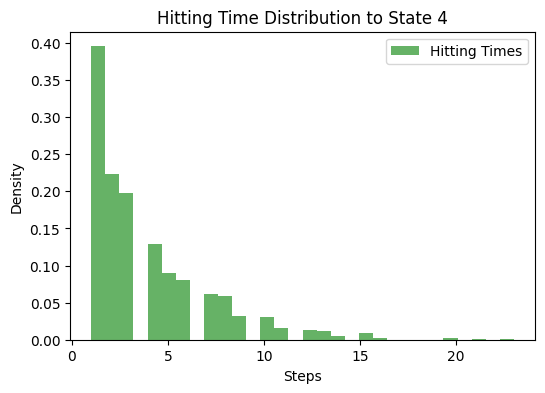

Generated Transition Matrix:
[[0.20991494 0.00283408 0.36147262 0.1452781  0.28050027]
 [0.40788938 0.09416766 0.14503949 0.03571154 0.31719194]
 [0.3520527  0.01333265 0.1921132  0.14357031 0.29893115]
 [0.32405261 0.112473   0.30465692 0.18696873 0.07184874]
 [0.02636911 0.44251507 0.02732292 0.08647669 0.41731622]]


In [61]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a random transition matrix
def gen_trans_mat(n):
    mat = np.random.rand(n, n)
    mat /= mat.sum(axis=1, keepdims=True)  # Normalize rows
    return mat

# Simulate a Markov chain
def sim_chain(T, init, steps):
    seq = [init]
    for _ in range(steps - 1):
        curr = seq[-1]
        nxt = np.random.choice(len(T), p=T[curr])
        seq.append(nxt)
    return seq

# Compute hitting time
def hit_time(T, start, target):
    state, count = start, 0
    while state != target:
        state = np.random.choice(len(T), p=T[state])
        count += 1
    return count

# Parameters
n_states, n_steps = 5, 50
start, target = 0, 4

# Generate transition matrix
T = gen_trans_mat(n_states)

# Simulate Markov chain
chain = sim_chain(T, start, n_steps)

# Compute hitting times
hits = [hit_time(T, start, target) for _ in range(1000)]

# Plot chain states over time
plt.figure(figsize=(6, 4))
plt.plot(range(n_steps), chain, marker='o', linestyle='-', color='g')
plt.xlabel('Step')
plt.ylabel('State')
plt.title('Markov Chain Simulation')
plt.show()

# Plot hitting times histogram
plt.figure(figsize=(6, 4))
plt.hist(hits, bins=30, density=True, alpha=0.6, color='green', label='Hitting Times')
plt.xlabel('Steps')
plt.ylabel('Density')
plt.title(f'Hitting Time Distribution to State {target}')
plt.legend()
plt.show()

# Display transition matrix
print("Generated Transition Matrix:")
print(T)

#Q4

Empirical vs Target Distribution:
State 0: Empirical = 0.102, Target = 0.100
State 1: Empirical = 0.205, Target = 0.200
State 2: Empirical = 0.293, Target = 0.300
State 3: Empirical = 0.399, Target = 0.400


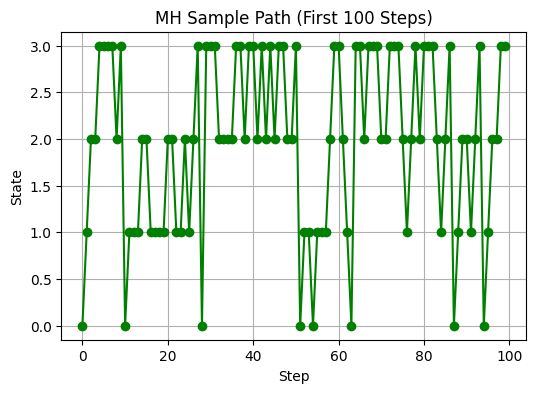

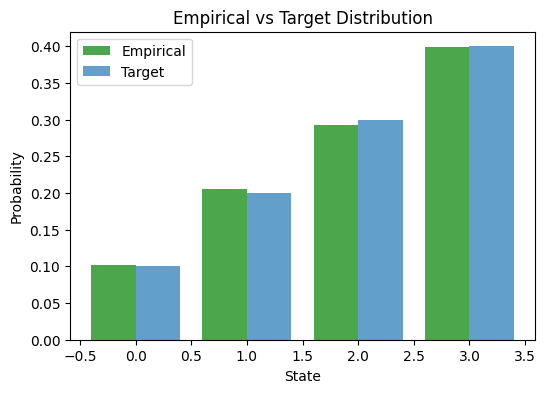

In [65]:
import numpy as np
import matplotlib.pyplot as plt

# Target distribution
pi_tgt = np.array([0.1, 0.2, 0.3, 0.4])
states = np.array([0, 1, 2, 3])
n = len(states)

# Proposal matrix (random walk on a circle)
P_prop = np.zeros((n, n))
for i in range(n):
    left, right = (i - 1) % n, (i + 1) % n
    P_prop[i, left], P_prop[i, right] = 0.5, 0.5

# Metropolis-Hastings Markov Chain
def mh_chain(steps, init=0):
    seq = np.zeros(steps, dtype=int)
    seq[0] = init
    for t in range(1, steps):
        i = seq[t - 1]
        j = np.random.choice(n, p=P_prop[i])
        if P_prop[i, j] == 0:
            seq[t] = i
            continue
        a_ij = min(1, (pi_tgt[j] * P_prop[j, i]) / (pi_tgt[i] * P_prop[i, j])) if P_prop[j, i] else 0
        seq[t] = j if np.random.rand() <= a_ij else i
    return seq

# Run simulation
steps = 10000
chain = mh_chain(steps)

# Compute empirical distribution
uniq, counts = np.unique(chain, return_counts=True)
pi_emp = counts / steps

# Display distributions
print("Empirical vs Target Distribution:")
for s in states:
    print(f"State {s}: Empirical = {pi_emp[s]:.3f}, Target = {pi_tgt[s]:.3f}")

# Plot sample path
plt.figure(figsize=(6, 4))
plt.plot(chain[:100], marker='o', linestyle='-', color='g')
plt.xlabel("Step")
plt.ylabel("State")
plt.title("MH Sample Path (First 100 Steps)")
plt.grid(True)
plt.show()

# Compare empirical vs target distribution
plt.figure(figsize=(6, 4))
plt.bar(states - 0.2, pi_emp, width=0.4, alpha=0.7, label="Empirical",color = "g")
plt.bar(states + 0.2, pi_tgt, width=0.4, alpha=0.7, label="Target")
plt.xlabel("State")
plt.ylabel("Probability")
plt.title("Empirical vs Target Distribution")
plt.legend()
plt.show()

#Q5


Running MH for 10 states...

Empirical vs Target Distribution:
State 0: Empirical = 0.037, Target = 0.039
State 1: Empirical = 0.180, Target = 0.179
State 2: Empirical = 0.067, Target = 0.070
State 3: Empirical = 0.188, Target = 0.189
State 4: Empirical = 0.071, Target = 0.076
State 5: Empirical = 0.178, Target = 0.170
State 6: Empirical = 0.009, Target = 0.009
State 7: Empirical = 0.133, Target = 0.131
State 8: Empirical = 0.124, Target = 0.124
State 9: Empirical = 0.014, Target = 0.013


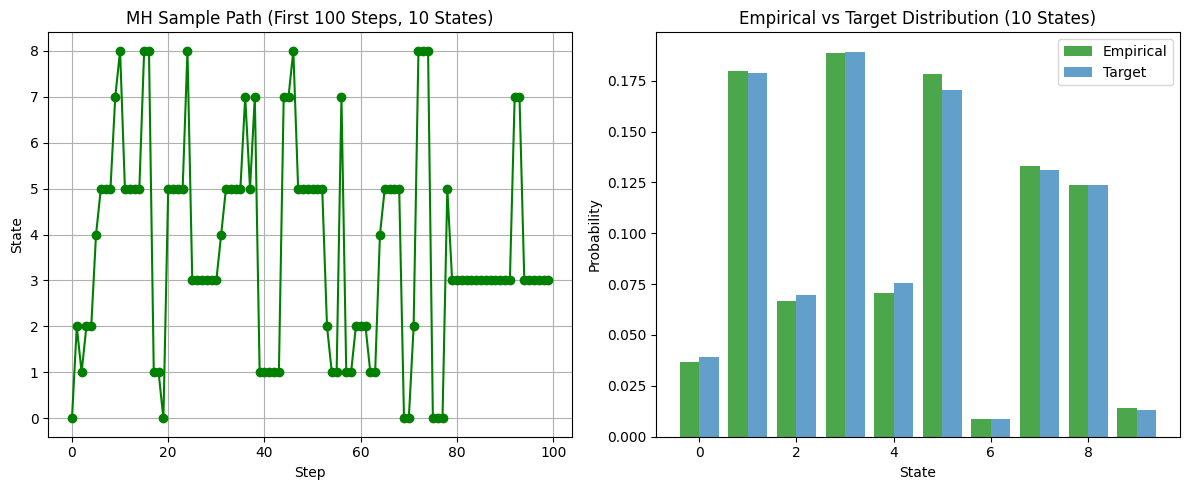


Running MH for 20 states...

Empirical vs Target Distribution:
State 0: Empirical = 0.042, Target = 0.043
State 1: Empirical = 0.075, Target = 0.072
State 2: Empirical = 0.017, Target = 0.018
State 3: Empirical = 0.019, Target = 0.020
State 4: Empirical = 0.005, Target = 0.005
State 5: Empirical = 0.060, Target = 0.060
State 6: Empirical = 0.038, Target = 0.039
State 7: Empirical = 0.076, Target = 0.084
State 8: Empirical = 0.098, Target = 0.098
State 9: Empirical = 0.066, Target = 0.062
State 10: Empirical = 0.028, Target = 0.028
State 11: Empirical = 0.074, Target = 0.077
State 12: Empirical = 0.036, Target = 0.036
State 13: Empirical = 0.004, Target = 0.005
State 14: Empirical = 0.022, Target = 0.022
State 15: Empirical = 0.090, Target = 0.087
State 16: Empirical = 0.015, Target = 0.018
State 17: Empirical = 0.075, Target = 0.071
State 18: Empirical = 0.058, Target = 0.058
State 19: Empirical = 0.102, Target = 0.097


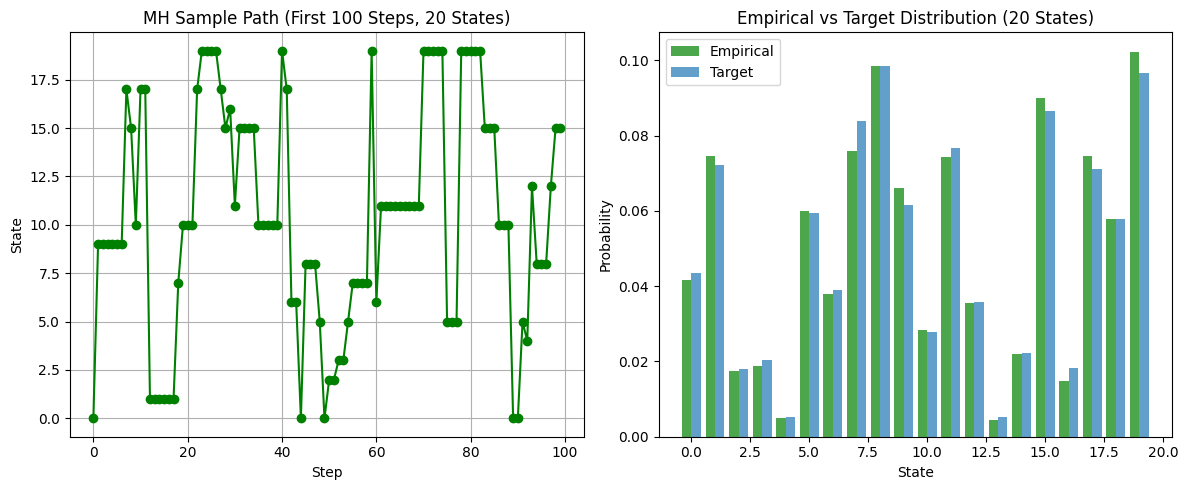


Running MH for 50 states...

Empirical vs Target Distribution:
State 0: Empirical = 0.005, Target = 0.004
State 1: Empirical = 0.010, Target = 0.010
State 2: Empirical = 0.010, Target = 0.010
State 3: Empirical = 0.023, Target = 0.024
State 4: Empirical = 0.003, Target = 0.004
State 5: Empirical = 0.032, Target = 0.029
State 6: Empirical = 0.032, Target = 0.032
State 7: Empirical = 0.026, Target = 0.030
State 8: Empirical = 0.011, Target = 0.013
State 9: Empirical = 0.007, Target = 0.007
State 10: Empirical = 0.025, Target = 0.026
State 11: Empirical = 0.005, Target = 0.005
State 12: Empirical = 0.017, Target = 0.015
State 13: Empirical = 0.021, Target = 0.019
State 14: Empirical = 0.022, Target = 0.021
State 15: Empirical = 0.011, Target = 0.010
State 16: Empirical = 0.035, Target = 0.036
State 17: Empirical = 0.025, Target = 0.024
State 18: Empirical = 0.030, Target = 0.027
State 19: Empirical = 0.029, Target = 0.033
State 20: Empirical = 0.036, Target = 0.036
State 21: Empirical = 

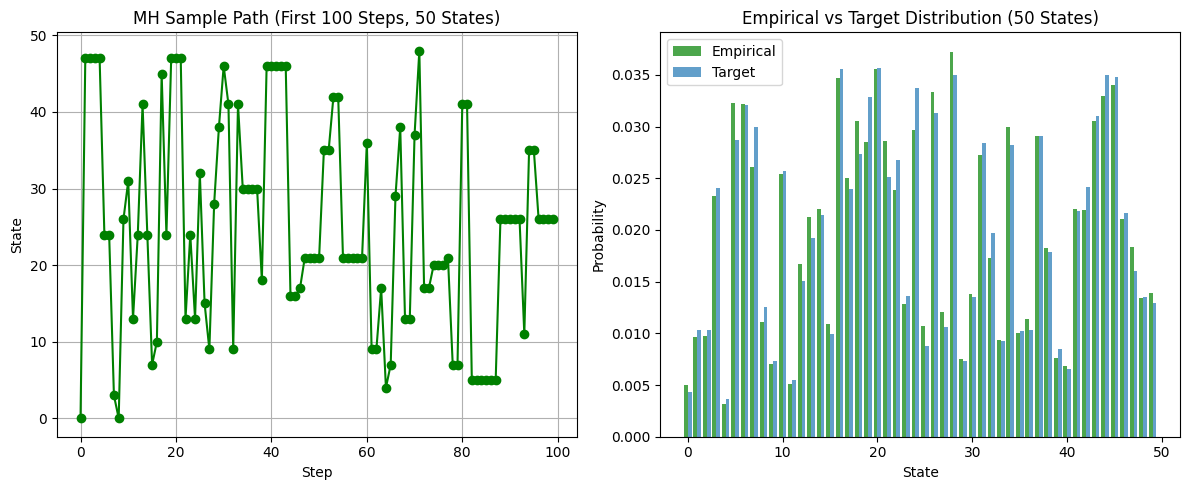

In [69]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a random transition matrix
def gen_trans_mat(n):
    mat = np.random.rand(n, n)
    mat /= mat.sum(axis=1, keepdims=True)  # Normalize rows
    return mat

# Metropolis-Hastings Markov Chain
def mh_chain(n, pi_tgt, P_prop, steps, init=0):
    seq = np.zeros(steps, dtype=int)
    seq[0] = init
    for t in range(1, steps):
        i = seq[t - 1]
        j = np.random.choice(n, p=P_prop[i])
        if P_prop[i, j] == 0:
            seq[t] = i
            continue
        a_ij = min(1, (pi_tgt[j] * P_prop[j, i]) / (pi_tgt[i] * P_prop[i, j])) if P_prop[j, i] else 0
        seq[t] = j if np.random.rand() <= a_ij else i
    return seq

# Run for multiple state sizes
steps = 20000
state_sizes = [10, 20, 50]

for n in state_sizes:
    print(f"\nRunning MH for {n} states...\n")
    pi_tgt = np.random.rand(n)
    pi_tgt /= pi_tgt.sum()
    P_prop = gen_trans_mat(n)
    chain = mh_chain(n, pi_tgt, P_prop, steps)

    uniq, counts = np.unique(chain, return_counts=True)
    pi_emp = counts / steps

    print("Empirical vs Target Distribution:")
    for s in range(n):
        print(f"State {s}: Empirical = {pi_emp[s]:.3f}, Target = {pi_tgt[s]:.3f}")

    # Subplot visualization for all cases
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))

    axs[0].plot(chain[:100], marker='o', linestyle='-', color='g')
    axs[0].set_xlabel("Step")
    axs[0].set_ylabel("State")
    axs[0].set_title(f"MH Sample Path (First 100 Steps, {n} States)")
    axs[0].grid(True)

    axs[1].bar(np.arange(n) - 0.2, pi_emp, width=0.4, alpha=0.7, label="Empirical",color = "g")
    axs[1].bar(np.arange(n) + 0.2, pi_tgt, width=0.4, alpha=0.7, label="Target")
    axs[1].set_xlabel("State")
    axs[1].set_ylabel("Probability")
    axs[1].set_title(f"Empirical vs Target Distribution ({n} States)")
    axs[1].legend()

    plt.tight_layout()
    plt.show()